### DSN - Titanic project solution

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. It was April 15-1912 during her maiden voyage, the Titanic sank after colliding with an iceberg and killing 1502 out of 2224 passengers and crew.

In this challenge, we were asked to complete the analysis of what sorts of people were likely to survive. In particular, we're asked to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
#linear algebra
import numpy as np
#data processing
import pandas as pd
#data visualisation
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

#  Data Modelling Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

#### Getting the data

Using pandas, we now load the dataset. Basically two files, one is for training purpose and other is for testing

In [2]:
# load the datasets using pandas's read_csv method
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(8)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S,NaN,0
5,895,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S,15,1
6,813,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,NaN,0
7,745,3,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.9500,NaN,Q,15,1


### Data Exploration
Getting statistical info

In [4]:
# using info method we can get quick overview of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
traveller_ID        916 non-null int64
ticket_class        916 non-null int64
name                916 non-null object
sex                 916 non-null object
age                 729 non-null float64
Siblings_spouses    916 non-null int64
Parchil             916 non-null int64
TickNum             916 non-null object
fare                915 non-null float64
cabin               204 non-null object
embarked            915 non-null object
MedBoat             327 non-null object
Survived            916 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 93.2+ KB


In [5]:
# Descriptive Statistics
train.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


#### Some observations that we can make from the above description:
    - Here we see that the youngest person on the ship was 2 months old i.e; s/he was a baby
    - The oldest person on the ship was 80 years old.
    -The highest fare of the ship was €512 (might be British Pounds)

In [6]:
train['Survived'].value_counts()

0    585
1    331
Name: Survived, dtype: int64

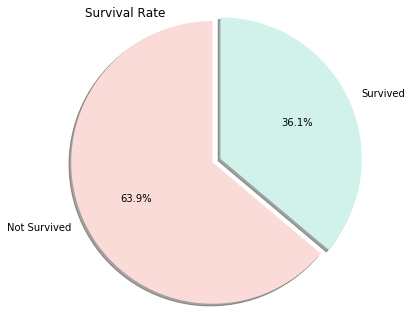

In [52]:
plt.figure(figsize=(10,5))
                         
color = ("#FADBD8", "#D1F2EB")
plt.pie(train["Survived"].value_counts(), data = train, explode=[0.08,0], labels=("Not Survived", "Survived"), 
        autopct="%1.1f%%", colors=color, shadow=True, startangle=90, radius=1.3)
plt.title("Survival Rate", loc="left")
plt.show()

Out of the total passengers travelling in titanic only 36.1% could survive which is not even the half of the passengers

#### Visualizing the count of survivers using columns - Sex, ticket_class, embarked

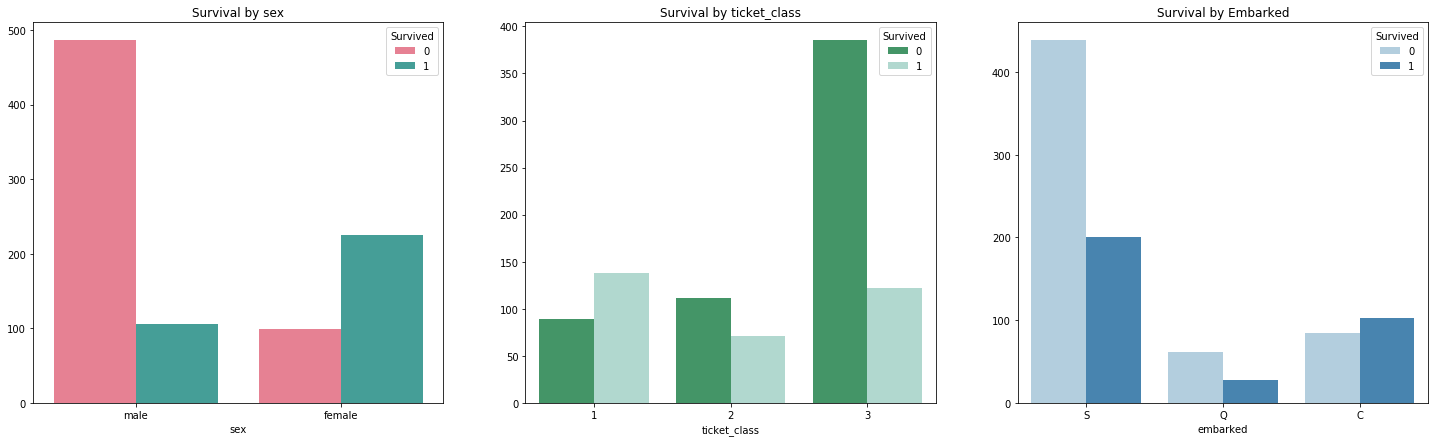

In [65]:
fig, axes = plt.subplots(1,3, figsize=(25,7))

#Survival by Sex
sns.countplot(x='sex', hue='Survived', data=train, ax=axes[0], palette="husl")
axes[0].set_title('Survival by sex')
axes[0].set_ylabel('')

#Survival by ticket_class
sns.countplot(x='ticket_class', hue='Survived', data=train, ax=axes[1], palette="BuGn_r")
axes[1].set_title('Survival by ticket_class')
axes[1].set_ylabel('')


#Survival by Embarkation
sns.countplot(x='embarked', hue='Survived', data=train, ax=axes[2], palette="Blues")
axes[2].set_title('Survival by Embarked')
axes[2].set_ylabel('')

plt.show()

#### From Survival by sex:
Though there are more males on the ship but females survival chances are more than males.
#### From survival by ticket_class:
Majority of the passengers belonged to third class but they did not survive & the maximum passengers survived from the 1st class when compared to the rest.
#### From survival by Embarkation:
Southampton has a lion's share when it comes to boarding on the ship, but they could not defeat the survival.

In [9]:
# Look at survival rate by sex
train.groupby('sex')[['Survived']].mean()

,Survived
sex,
female,0.694444
male,0.179054


Clearly, survival chances of males is very low when compared to females.
We can also recall from the movie, females & children were given 1st preference while loading on a life-boat & this statistics proves it.


In [10]:
# Survival rate by sex and class
train.pivot_table('Survived', index = 'sex', columns = 'ticket_class')

ticket_class,1,2,3
sex,,,
female,0.960784,0.890625,0.443038
male,0.320000,0.118644,0.148997


Observations we can make from the above:
- 1st class has the highest survival rate.
- Females from 1st class have the highest survival rate of 96.8%.
- Survival rate of males overall is very less, survival of males in 1st class is 36.8% which is still lower than the survival chances of females in 3rd class which is 50%

Text(0, 0.5, '')

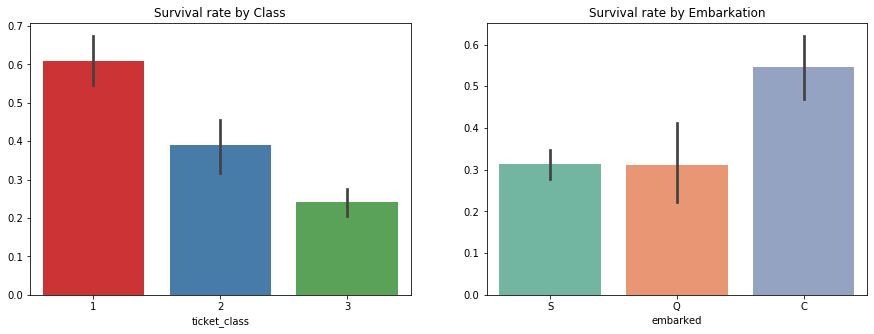

In [11]:
# sns.barplot(y='ticket_class', x='sex', hue= 'Survived', data=train, palette="seismic")
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.barplot(x='ticket_class', y='Survived', data = train, palette='Set1', ax=axes[0])
axes[0].set_title('Survival rate by Class')
axes[0].set_ylabel('')

sns.barplot(x='embarked', y='Survived', data = train, palette='Set2', ax=axes[1])
axes[1].set_title('Survival rate by Embarkation')
axes[1].set_ylabel('')

Observations we can make from the above:
- Survival rate of 1st class is higher than 60% irrespective of the gender.
- Survival rate of passengers embarking from Cherbourg almost above 50% irrespective of the gender.

In [12]:
# Survival rate bt age, class & sex
Age = pd.cut(train['age'], [0,18,30,80])
train.pivot_table('Survived', ('sex', Age), 'ticket_class')

ticket_class            1         2         3
sex    age                                   
female (0, 18]   0.900000  0.888889  0.531915
       (18, 30]  0.968750  0.838710  0.341463
       (30, 80]  0.962264  0.954545  0.409091
male   (0, 18]   0.714286  0.500000  0.200000
       (18, 30]  0.285714  0.080000  0.155738
       (30, 80]  0.308824  0.062500  0.166667

Some Inferences from the above table:

- Interestingly females from 1st class of (infants + teenagers) have a surival rate of 90%
- A female who is 30yrs and above & belongs to 1st class, then the chances of survival is 96%
- Survival rate of adult females from 3rd class is 40.9% which is still way higher than the adult males of 2nd class i.e; 6.25%
- Highest survival chances in males is 71.4% who belong to 1st class (infants + teenagers)

### Data Manipulation


In [13]:
train.head(3)

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S,11,1


#### Next, checking for missing values

In [14]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = train.isnull().sum()/train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
cabin,712,77.7
MedBoat,589,64.3
age,187,20.4
embarked,1,0.1
fare,1,0.1
Survived,0,0.0
TickNum,0,0.0
Parchil,0,0.0
Siblings_spouses,0,0.0
sex,0,0.0


Above you can see the 12 features + the target variable (survived). What features could contribute to a high survival rate ?

To me it would make sense if everything except ‘traveller_ID’, ‘TickNum’ and ‘name’ would be correlated with a high survival rate.

Exploring the categories in MedBoat column in the train dataset. This shows the labels for each boat that was deployed for survival

In [15]:
train['MedBoat'].value_counts()

13       30
15       25
C        22
4        22
10       21
11       20
5        20
3        18
14       17
D        16
9        16
16       14
8        13
7        13
2        12
6        12
12       11
A         9
B         6
1         5
13 15     2
15 16     1
5 7       1
8 10      1
Name: MedBoat, dtype: int64

From the titanic movie,majority of those who survived had access to the medical boat

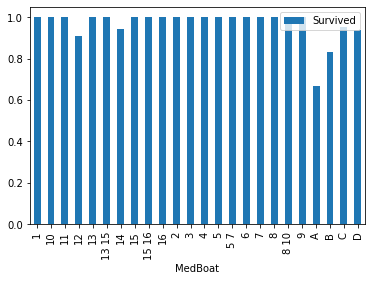

In [16]:
med= train.pivot_table(index='MedBoat',values='Survived')
med.plot.bar()

The plot above proves those that majority of those who survived had access to the medical boat.

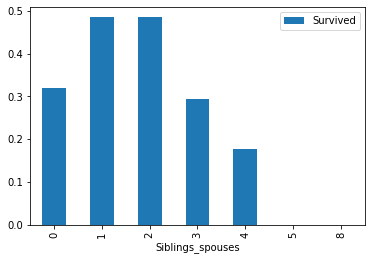

In [17]:
med= train.pivot_table(index='Siblings_spouses',values='Survived')
med.plot.bar()

It seems that travellers having a lot of siblings/spouses have less chance to survive. Single travellers (0 Siblings_spouses) or with one or two other persons (Siblings_spouses 1 or 2) have more chance to survive.

### Feature Engineering

We can assume that people's title influences how they are treated. In our case, we have several titles (like Mr, Mrs, Miss, Master etc ), but only some of them are shared by a significant number of people. Accordingly, it would be interesting if we could group some of the titles and simplify our analysis.

Let's analyse the 'name' and see if we can find a sensible way to group them. But first we concat the two dataset;

In [18]:
dataset =  pd.concat([train, test], axis=0).reset_index(drop=True)

In [19]:
dataset['name'].head(10)

0                                  Smiljanic, Mr. Mile
1                            Bostandyeff, Mr. Guentcho
2    Phillips, Miss. Kate Florence ("Mrs Kate Louis...
3                    Sage, Miss. Dorothy Edith "Dolly"
4                       Henriksson, Miss. Jenny Lovisa
5                         Johnson, Miss. Eleanor Ileen
6               Franklin, Mr. Charles (Charles Fardon)
7               Daly, Miss. Margaret Marcella "Maggie"
8                                     Moran, Mr. James
9                             O'Connell, Mr. Patrick D
Name: name, dtype: object

In [20]:
dataset['title']=dataset['name'].str.extract(' ([A-Za-z]+)\.',expand=False)

In [21]:
dataset['title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Mlle          2
Major         2
Dona          1
Countess      1
Jonkheer      1
Mme           1
Capt          1
Don           1
Sir           1
Lady          1
Name: title, dtype: int64

In [22]:
dataset.title.nunique()

18

There is 18 titles in the dataset and most of them are very uncommon so we like to group them in 5 categories.


In [23]:
title_dataset = {'Major':'official','Don':'official','Countess':'official','Master':'Master','Dr':'official','Rev':'official',
            'Col':'official','Sir':'official','Capt':'official','Dona':'official',
            'Jonkheer':'official','Lady':'official','Ms':'Miss','Mlle':'Miss',
            'Mme':'Mrs','Mr':'Mr','Mrs':'Mrs','Miss':'Miss'}
len(title_dataset)

18

In [24]:
# Here we map each key to obtain the values
dataset['title'] = dataset['title'].map(title_dataset)
dataset['title'].value_counts()

Mr          757
Miss        264
Mrs         198
Master       61
official     29
Name: title, dtype: int64

In [25]:
# filling embarked with the most frequent
dataset.embarked = dataset.embarked.fillna('S')
#72,133,626
dataset.embarked.isna().sum()

0

In [26]:
# filling the medboat column with unknown type
dataset.MedBoat = dataset.MedBoat.fillna('Unknown type')

In [27]:
dataset.head()

,MedBoat,Parchil,Siblings_spouses,Survived,TickNum,age,cabin,embarked,fare,name,sex,ticket_class,traveller_ID,title
0,Unknown type,0.0,0.0,0.0,315037,NaN,NaN,S,8.6625,"Smiljanic, Mr. Mile",male,3.0,1214,Mr
1,Unknown type,0.0,0.0,0.0,349224,26.0,NaN,S,7.8958,"Bostandyeff, Mr. Guentcho",male,3.0,677,Mr
2,11,0.0,0.0,1.0,250655,19.0,NaN,S,26.0000,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,2.0,534,Miss
3,Unknown type,2.0,8.0,0.0,CA. 2343,NaN,NaN,S,69.5500,"Sage, Miss. Dorothy Edith ""Dolly""",female,3.0,1174,Miss
4,Unknown type,0.0,0.0,0.0,347086,28.0,NaN,S,7.7750,"Henriksson, Miss. Jenny Lovisa",female,3.0,864,Miss


In [28]:
# median
traind = train.copy()
testd = test.copy()
combine = [traind,testd]
for df in combine:
    df.age = df.age.fillna(df.age.median())
    df.fare = df.fare.fillna(df.fare.median())

In [29]:
def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(column_name,axis=1)
    return df

In [30]:
#### train median, test median

traind = create_dummies(traind,'cabin')
traind = create_dummies(traind,'MedBoat')

testd = create_dummies(testd,'cabin')
testd = create_dummies(testd,'MedBoat')

In [31]:
traind.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,...,MedBoat_5 7,MedBoat_6,MedBoat_7,MedBoat_8,MedBoat_8 10,MedBoat_9,MedBoat_A,MedBoat_B,MedBoat_C,MedBoat_D
0,1214,3,"Smiljanic, Mr. Mile",male,28.0,0,0,315037,8.6625,S,...,0,0,0,0,0,0,0,0,0,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,...,0,0,0,0,0,0,0,0,0,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S,...,0,0,0,0,0,0,0,0,0,0
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,S,...,0,0,0,0,0,0,0,0,0,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,...,0,0,0,0,0,0,0,0,0,0


In [32]:
le = LabelEncoder()
## train median, test median

dataset.sex = le.fit_transform(dataset.sex)
dataset.embarked = le.fit_transform(dataset.embarked)
dataset.title = le.fit_transform(dataset.title)


In [33]:
# selecting best columns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier(random_state = 1)    


def select_features(df):
    df = df.select_dtypes([np.number]).dropna(axis = 1)
    all_x = df.drop(['traveller_ID', 'Survived'], axis = 1)
    all_y = df['Survived']
    selector = RFECV(rf, cv = 10)
    selector.fit(all_x, all_y)
    optimized_columns = list(all_x.columns[selector.support_])
    print('best columns are: ', '{}'.format(optimized_columns))
    return optimized_columns

In [34]:
d = select_features(traind)
d

best columns are:  ['ticket_class', 'age', 'Siblings_spouses', 'Parchil', 'fare', 'cabin_A23', 'cabin_B58 B60', 'cabin_B86', 'cabin_C123', 'cabin_C132', 'cabin_C22 C26', 'cabin_C23 C25 C27', 'cabin_C78', 'cabin_C89', 'cabin_D26', 'cabin_F E69', 'cabin_F G63', 'cabin_F33', 'MedBoat_1', 'MedBoat_10', 'MedBoat_11', 'MedBoat_12', 'MedBoat_13', 'MedBoat_13 15', 'MedBoat_14', 'MedBoat_15', 'MedBoat_15 16', 'MedBoat_16', 'MedBoat_2', 'MedBoat_3', 'MedBoat_4', 'MedBoat_5', 'MedBoat_5 7', 'MedBoat_6', 'MedBoat_7', 'MedBoat_8', 'MedBoat_8 10', 'MedBoat_9', 'MedBoat_A', 'MedBoat_B', 'MedBoat_C', 'MedBoat_D']


['ticket_class',
 'age',
 'Siblings_spouses',
 'Parchil',
 'fare',
 'cabin_A23',
 'cabin_B58 B60',
 'cabin_B86',
 'cabin_C123',
 'cabin_C132',
 'cabin_C22 C26',
 'cabin_C23 C25 C27',
 'cabin_C78',
 'cabin_C89',
 'cabin_D26',
 'cabin_F E69',
 'cabin_F G63',
 'cabin_F33',
 'MedBoat_1',
 'MedBoat_10',
 'MedBoat_11',
 'MedBoat_12',
 'MedBoat_13',
 'MedBoat_13 15',
 'MedBoat_14',
 'MedBoat_15',
 'MedBoat_15 16',
 'MedBoat_16',
 'MedBoat_2',
 'MedBoat_3',
 'MedBoat_4',
 'MedBoat_5',
 'MedBoat_5 7',
 'MedBoat_6',
 'MedBoat_7',
 'MedBoat_8',
 'MedBoat_8 10',
 'MedBoat_9',
 'MedBoat_A',
 'MedBoat_B',
 'MedBoat_C',
 'MedBoat_D']

In [35]:
# getting the best features
a = []
traindn = []
for t in traind.columns:
    if t in testd.columns:
        traindn.append(t)
    elif t not in testd.columns:
        a.append(t)
r = []
f = []
for t in traindn:
    if t in d:
        r.append(t)
    elif t not in d:
        f.append(t)
len(r)

29

In [36]:
# Separating the target from the train model

Xd = traind[r]
yd = traind.Survived
testdn = testd[r]

In [37]:
traind.head()

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,embarked,...,MedBoat_5 7,MedBoat_6,MedBoat_7,MedBoat_8,MedBoat_8 10,MedBoat_9,MedBoat_A,MedBoat_B,MedBoat_C,MedBoat_D
0,1214,3,"Smiljanic, Mr. Mile",male,28.0,0,0,315037,8.6625,S,...,0,0,0,0,0,0,0,0,0,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0,0,0,349224,7.8958,S,...,0,0,0,0,0,0,0,0,0,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,S,...,0,0,0,0,0,0,0,0,0,0
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.5500,S,...,0,0,0,0,0,0,0,0,0,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,S,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
xdtr,xdt,ydtr,ydt = train_test_split(Xd,yd,test_size=0.2,random_state=42)

In [39]:
svm = RandomForestClassifier()
svm.fit(xdtr,ydtr)
y_pred = svm.predict(xdt)
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(ydt, y_pred))
print("Precision: ", metrics.precision_score(ydt, y_pred))
print("Recall: ", metrics.recall_score(ydt, y_pred))
print("f1 score: ",metrics.f1_score(ydt,y_pred))

Accuracy:  0.9130434782608695
Precision:  0.9285714285714286
Recall:  0.8125
f1 score:  0.8666666666666666


In [40]:
np.logspace(-4,4)

array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
       1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
       8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04])

In [41]:
def select_model(df):
    all_x = df[r]
    all_y = df['Survived']
    
    
    models = [
        {
            "name": "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters":
                {
                    "C": np.logspace(-4,4),
                    "solver": ["newton-cg", "lbfgs", "liblinear"]
                }
        },
        {
            "name": "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters":
                {
                    "n_neighbors": range(1,20,2),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2]
                }
        },
        {
            "name": "RandomForestClassifier",
            "estimator": RandomForestClassifier(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [1,2,3,4,5,6,7,8,9,10],
                    "criterion": ["entropy", "gini"],
                    "max_depth": [2,3,4, 5,6,7,8,9, 10],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": [1, 5, 8],
                    "min_samples_split": [2, 3, 5]

                }
        }
        
   
                
    ]
    for i in models:
        print(i['name'])
        print('----------')
        grid = GridSearchCV(i['estimator'], param_grid = i['hyperparameters'], cv = 10)
        grid.fit(all_x, all_y)
        i['best_parameters'] = grid.best_params_
        i['best_score'] = grid.best_score_
        i['best_model'] = grid.best_estimator_
        print('best parameters for this model are: ', i['best_parameters'])
        print('best score for this model is: ', i['best_score'])
        print('----------', '\n')
    return models

In [42]:
select_model(traind)

LogisticRegression
----------
best parameters for this model are:  {'C': 339.3221771895323, 'solver': 'newton-cg'}
best score for this model is:  0.9672489082969432
---------- 

KNeighborsClassifier
----------
best parameters for this model are:  {'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
best score for this model is:  0.74235807860262
---------- 

RandomForestClassifier
----------
best parameters for this model are:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 10}
best score for this model is:  0.9192139737991266
---------- 



[{'name': 'LogisticRegression',
  'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False),
  'hyperparameters': {'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
          4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
          2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
          9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
          4.09491506e-02, 5.96362332e-02, 8.68511374e-02, 1.26485522e-01,
          1.84206997e-01, 2.68269580e-01, 3.90693994e-01, 5.68986603e-01,
          8.28642773e-01, 1.20679264e+00, 1.75751062e+00, 2.55954792e+00,
          3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
          1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.179474

In [49]:
rt = RandomForestClassifier(criterion = 'gini', max_depth= 10, max_features= 'log2',
                            min_samples_leaf= 5, min_samples_split=2, n_estimators =  9)

In [50]:
e = rt.fit(Xd,yd)

In [45]:
y_pred = e.predict(testdn)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [46]:
submit = pd.DataFrame({"traveller_ID":testd['traveller_ID'],'Survived':y_pred})
submit.head()

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0


In [47]:
submit.to_csv('submission.csv',index=False)